In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data cleaning

# Load the data from the original CSV file
data = pd.read_csv('merged.csv')

total_rows = len(data)

# Print the total number of rows
print(f"Total number of rows in the cleaned data: {total_rows}")

# Remove duplicates
data = data.drop_duplicates()

# Drop rows with missing values
data.dropna(inplace=True)

# Filter rows with non-participants in 2022 and 2023
data = data[(data['PARTICIPATION IN 2022'] !="NO") | (data['PARTICIPATION IN 2023'] != "NO")]

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)
print("Data cleaning completed.")
total_rows = len(data)

# Print the total number of rows
print(f"Total number of rows in the cleaned data: {total_rows}")

Total number of rows in the cleaned data: 1323
Data cleaning completed.
Total number of rows in the cleaned data: 1069


In [3]:
#data transformation

# Read the merged CSV file
merged_df = pd.read_csv('cleaned_data.csv')

# Define a mapping for the transformation
mapping = {'YES': 1, 'NO': 0}

# Replace values in the specified columns with the mapping
columns_to_transform = ['PART OF NSO OR NOT','PARTICIPATION IN 2022', 'PARTICIPATION IN 2023', 'WINNERS OF 2022', 'WINNERS OF 2023']
merged_df[columns_to_transform] = merged_df[columns_to_transform].replace(mapping)


#feature engineering
# Create a new column 'GAME_ID' based on the mapping
mapping_game = {'Badminton': 1, 'Basketball': 2, 'Football': 3, 'Cricket': 4, 'Volleyball': 5, 'Table Tennis': 6, 'Tennis': 7, 'Carroms': 8, 'Kabaddi': 9, 'Chess': 10}
merged_df['GAME_ID'] =merged_df['GAME'].map(mapping_game)

# Create a new column 'DEPARTMENT_ID' based on the mapping
mapping_department = {'CSE': 1, 'ECE': 2, 'MECH': 3}
merged_df['DEPARTMENT_ID'] = merged_df['DEPARTMENT'].map(mapping_department)


# Save the transformed dataset to a new CSV file
merged_df.to_csv('transformed_data.csv', index=False)
print("Data Transformation is succesfull!!")

Data Transformation is succesfull!!


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2000\1927191031.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[columns_to_transform] = merged_df[columns_to_transform].replace(mapping)


                          BATCH  PART OF NSO OR NOT  PARTICIPATION IN 2022  \
BATCH                  1.000000           -0.008564              -0.637859   
PART OF NSO OR NOT    -0.008564            1.000000               0.071104   
PARTICIPATION IN 2022 -0.637859            0.071104               1.000000   
PARTICIPATION IN 2023  0.564674           -0.014208              -0.389546   
WINNERS OF 2022       -0.738360            0.055746               0.386276   
WINNERS OF 2023       -0.002339           -0.052137               0.033593   
GAME_ID               -0.148009            0.024477               0.090767   
DEPARTMENT_ID         -0.017132           -0.028574               0.039650   

                       PARTICIPATION IN 2023  WINNERS OF 2022  \
BATCH                               0.564674        -0.738360   
PART OF NSO OR NOT                 -0.014208         0.055746   
PARTICIPATION IN 2022              -0.389546         0.386276   
PARTICIPATION IN 2023               1

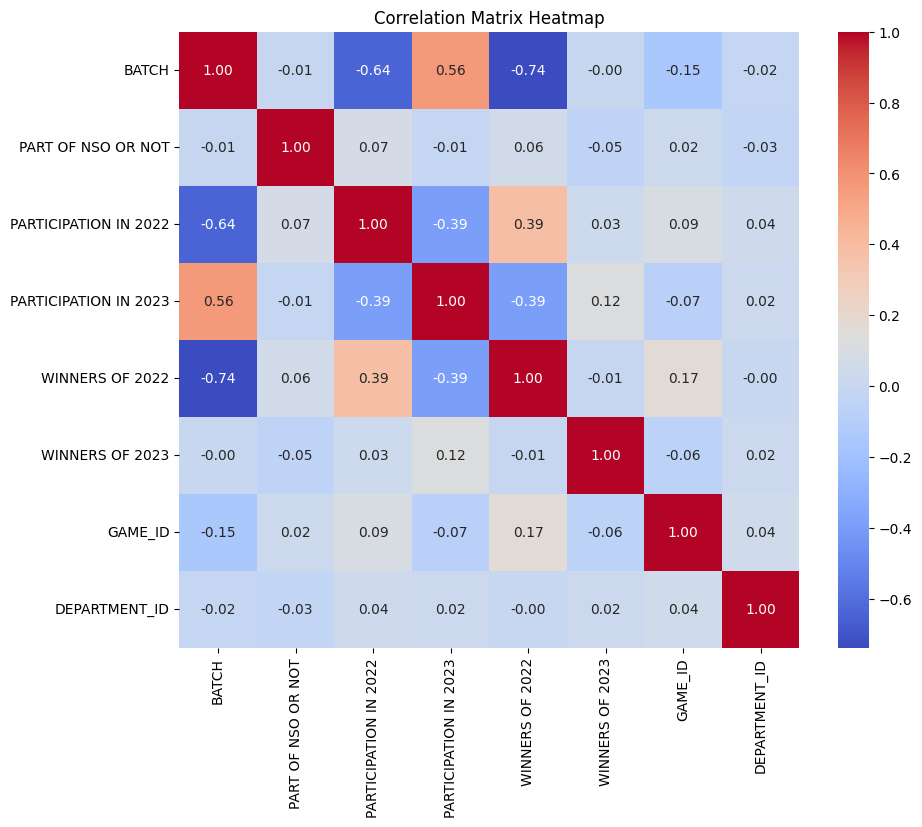

In [6]:
#data reduction


# Read the transformed CSV file
transformed_df = pd.read_csv('transformed_data.csv')

# Calculate the correlation matrix
#correlation_matrix = transformed_df.corr()

specified_columns = ['BATCH','PART OF NSO OR NOT','PARTICIPATION IN 2022','PARTICIPATION IN 2023','WINNERS OF 2022','WINNERS OF 2023','GAME_ID']  

# Specify the target variable
target_variable = 'DEPARTMENT_ID'

# Calculate the correlation matrix
correlation_matrix = transformed_df[specified_columns + [target_variable]].corr()
print(correlation_matrix )

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")

# Find the absolute correlation values between the target variable and other columns
correlation_with_target = correlation_matrix[target_variable].abs()
print(correlation_with_target)
# Define a threshold for correlation (you can adjust this value)
correlation_threshold = 0.015  # threshold, you can change it based on your needs

# Identify columns with correlation less than the threshold
columns_to_remove = correlation_with_target[correlation_with_target < correlation_threshold].index
print("The columns that are less relevant to our prediction model is/are :",columns_to_remove)
print("So we are removing these columns for our better prediction.")

# Drop the less relevant columns
reduced_df = transformed_df.drop(columns=columns_to_remove)

# Save the reduced dataset to a new CSV file
reduced_df.to_csv('reduced_data.csv', index=False)
print("Data reduction is successfull !!")